<a href="https://colab.research.google.com/github/Samuel-Ovuehor/Python-Code/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from scipy.stats.stats import pearsonr # Pearson’s
from scipy.stats.stats import spearmanr # Spearman’s
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Descriptive analysis of the data

In [ ]:
df=pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic 23.csv")
df.describe
df = df.rename(columns={'OBED': 'BMI_weight'})
df.head()

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_weight
0,Female,1,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,Normal weight
1,Female,1,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,Normal weight
2,Male,0,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,Normal weight
3,Male,0,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I
4,Male,0,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II


In [ ]:
df['BMI'] = df['Weight']/(df['Height']**2)

In [ ]:
def weight_grp(BMI):
  if BMI < 18.5:
    return "Underweight"
  elif BMI >18.5 and BMI < 24.9:
    return "Healthyweight"
  elif BMI > 25.0 and BMI < 29.9:
    return "Overweight"
  elif BMI > 30 and BMI < 34.9:
    return "Obese"
  elif BMI > 35.0 and BMI < 39.9:
    return "Obesity Type 1"
  else:
    return "Obesity Type 2"

In [ ]:
df['BMI2'] = df['BMI'].apply(weight_grp) 
df

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_weight,BMI,BMI2
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,Normal weight,24.386526,Healthyweight
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,Normal weight,24.238227,Healthyweight
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,Normal weight,23.765432,Healthyweight
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II,28.342381,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III,44.901475,Obesity Type 2
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.741923,Obesity Type 2
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.543817,Obesity Type 2
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III,44.071535,Obesity Type 2


In [ ]:
df["BMI_weight"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal weight          287
Under weight           272
Name: BMI_weight, dtype: int64

In [ ]:

df.head()
df.tail()
df.shape

(2111, 20)

In [ ]:
df.isnull().sum()

Gender                            0
Gender_2                          0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
BMI_weight                        0
BMI                               0
BMI2                              0
dtype: int64

In [ ]:
df.describe()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.315964,1.701677,86.586058,0.817622,0.883941,2.440550,2.700616,1.140692,0.020843,2.037423,0.045476,1.033160,0.690668,0.731407,29.700159
std,0.500083,6.357078,0.093305,26.191172,0.386247,0.320371,0.577742,0.803071,0.468543,0.142893,0.691192,0.208395,0.901205,0.676276,0.515498,8.011337
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.998685
25%,0.000000,20.000000,1.630000,65.473343,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,24.325802
50%,0.000000,23.000000,1.700499,83.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,28.719089
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,1.000000,36.016501
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,50.811753


In [ ]:
df.groupby(by='Gender').mean()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Gender,,,,,,,,,,,,,,,,
Female,1.0,24.002876,1.643298,82.302364,0.777565,0.862895,2.590604,2.641419,1.184084,0.014382,1.989453,0.067114,0.859060,0.694151,0.735379,30.130002
Male,0.0,24.621723,1.758690,90.769478,0.856742,0.904494,2.294007,2.758427,1.098315,0.027154,2.084270,0.024345,1.203184,0.687266,0.727528,29.280377


In [ ]:
df.groupby(by='Gender').size()

Gender
Female    1043
Male      1068
dtype: int64

In [ ]:
df.groupby(by='Gender').min()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_weight,BMI,BMI2
Gender,,,,,,,,,,,,,,,,,,,
Female,1,15,1.45,39.0,0,0,1,1,0,0,1,0,0,0,0,Automobile,Normal weight,12.998685,Healthyweight
Male,0,14,1.56,45.0,0,0,1,1,0,0,1,0,0,0,0,Automobile,Normal weight,13.291588,Healthyweight


In [ ]:
df.groupby(by='Gender').max()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI_weight,BMI,BMI2
Gender,,,,,,,,,,,,,,,,,,,
Female,1,61,1.843419,165.057269,1,1,3,4,3,1,3,1,3,2,2,Walking,Under weight,50.811753,Underweight
Male,0,56,1.980000,173.000000,1,1,3,4,3,1,3,1,3,2,3,Walking,Under weight,49.472390,Underweight


In [ ]:
df.groupby(by='Gender').describe()

Gender_2                                       Age              ...  \
          count mean  std  min  25%  50%  75%  max   count       mean  ...   
Gender                                                                 ...   
Female   1043.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1043.0  24.002876  ...   
Male     1068.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1068.0  24.621723  ...   

       CALC          BMI                                             \
        75%  max   count       mean       std        min        25%   
Gender                                                                
Female  1.0  2.0  1043.0  30.130002  9.399448  12.998685  22.363653   
Male    1.0  3.0  1068.0  29.280377  6.346875  13.291588  25.572407   

                                         
              50%        75%        max  
Gender                                   
Female  28.465346  40.084283  50.811753  
Male    28.905612  35.219092  49.472390  

[2 rows x 128 columns]

#Visualisation of the data

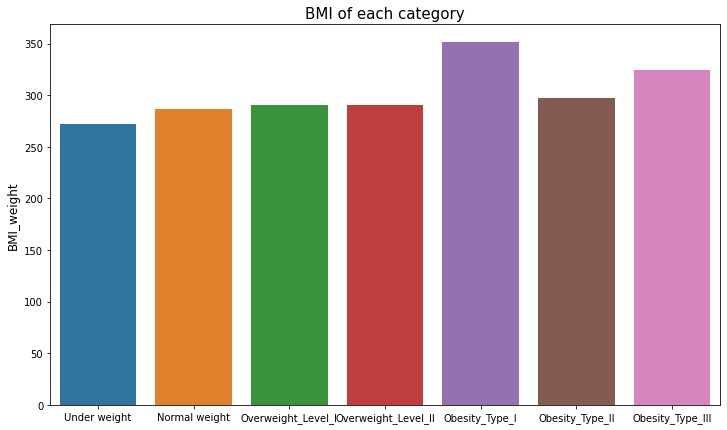

In [ ]:
name = df['BMI_weight'].value_counts().index
num = df['BMI_weight'].value_counts().values

fig = px.pie(data_frame=df,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,7))
sns.countplot(x='BMI_weight',data=df,order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('BMI_weight',fontsize=12)
plt.title('BMI of each category',fontsize=15)
plt.show()

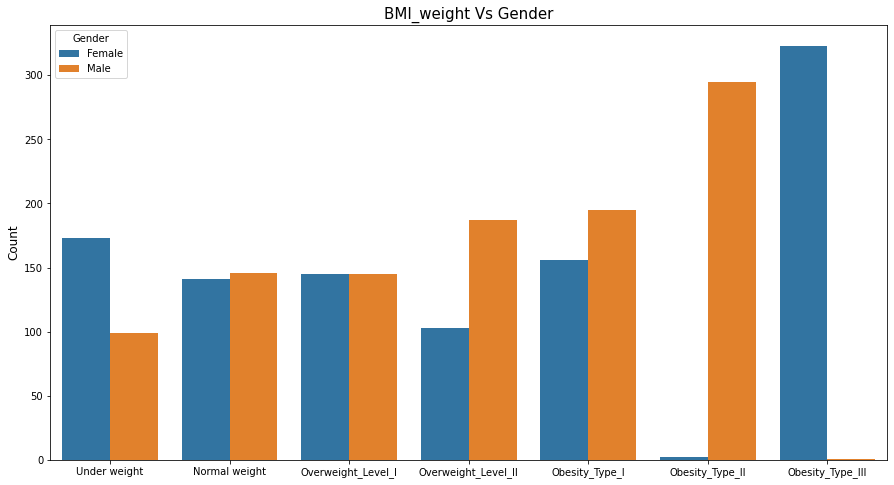

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='Gender',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Gender',fontsize=15)
plt.show()


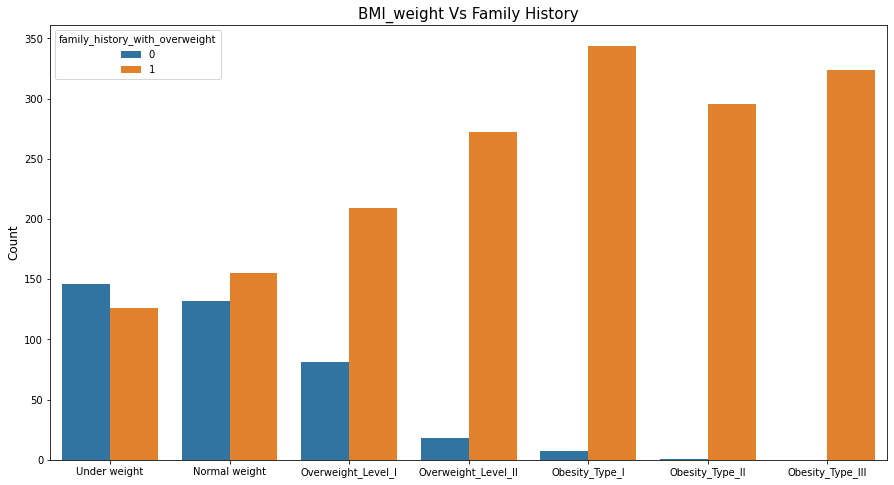

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='family_history_with_overweight',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Family History',fontsize=15)
plt.show()


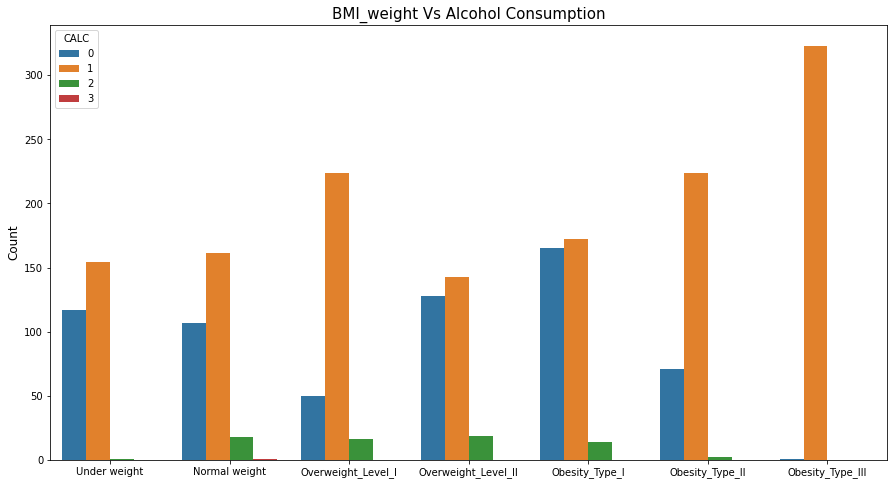

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='CALC',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Alcohol Consumption',fontsize=15)
plt.show()

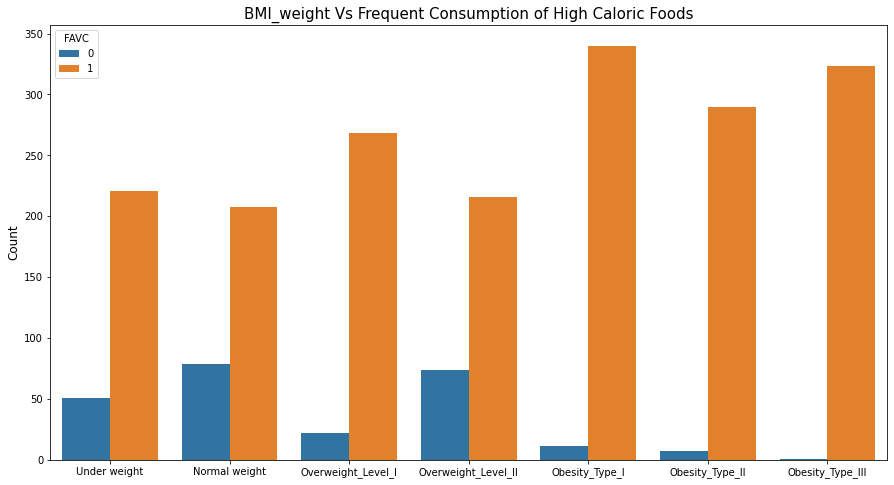

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='FAVC',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Frequent Consumption of High Caloric Foods',fontsize=15)
plt.show()

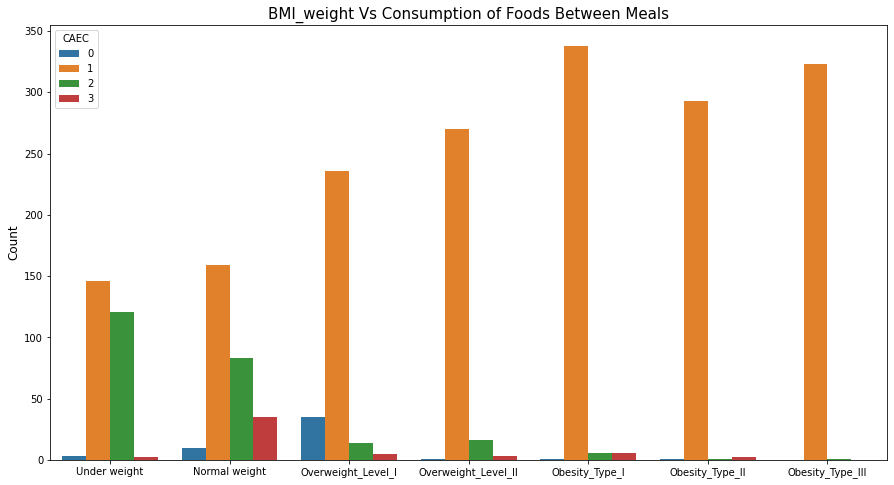

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='CAEC',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Consumption of Foods Between Meals',fontsize=15)
plt.show()

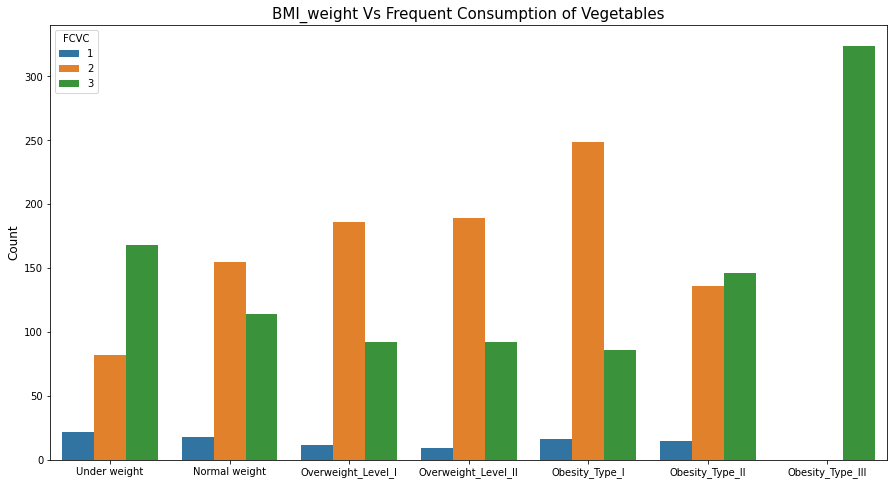

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI_weight',data=df,hue='FCVC',
            order=['Under weight','Normal weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('BMI_weight Vs Frequent Consumption of Vegetables',fontsize=15)
plt.show()

#Statistical Analysis

In [ ]:
x = df[['Height','Weight', 'NCP', 'FAF', 'TUE', 'CH2O', 'SCC', 'FCVC', "CALC", "CAEC"]]

x.corr(method ='pearson')

,Height,Weight,NCP,FAF,TUE,CH2O,SCC,FCVC,CALC,CAEC
Height,1.000000,0.463136,0.243724,0.296423,0.059041,0.177753,-0.133753,-0.045006,0.129732,-0.048818
Weight,0.463136,1.000000,0.099798,-0.033244,-0.032487,0.195419,-0.201906,0.187764,0.206677,-0.287493
NCP,0.243724,0.099798,1.000000,0.133561,0.017019,0.066300,-0.017725,0.021888,0.071264,0.093102
FAF,0.296423,-0.033244,0.133561,1.000000,0.047943,0.118220,0.070196,0.027454,-0.080795,0.022618
TUE,0.059041,-0.032487,0.017019,0.047943,1.000000,-0.017807,-0.021200,-0.070743,-0.023643,0.031218
CH2O,0.177753,0.195419,0.066300,0.118220,-0.017807,1.000000,-0.001950,0.067882,0.097390,-0.136266
SCC,-0.133753,-0.201906,-0.017725,0.070196,-0.021200,-0.001950,1.000000,0.069702,0.003463,0.109179
FCVC,-0.045006,0.187764,0.021888,0.027454,-0.070743,0.067882,0.069702,1.000000,0.041043,0.047546
CALC,0.129732,0.206677,0.071264,-0.080795,-0.023643,0.097390,0.003463,0.041043,1.000000,-0.047540
CAEC,-0.048818,-0.287493,0.093102,0.022618,0.031218,-0.136266,0.109179,0.047546,-0.047540,1.000000


###Four models- the models are based on weight as ID, where Family history, and height were made constants in the IV then we varied other parameters such as alcohol(CALC), consumption of food between meals(CAEC), veganism(FCVC) and high caloric consumption (FAVC)



##Model 1
> Indented block



In [ ]:
# Model 1 – ‘Weight’ as the DV & ‘NCP’ and ‘FAVC’ as the IVs 
 
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight", "Height", "CALC"]] #  IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl1 = sm.OLS(y, x).fit() 
print(mdl1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     470.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.27e-234
Time:                        11:50:08   Log-Likelihood:                -9346.9
No. Observations:                2111   AIC:                         1.870e+04
Df Residuals:                    2107   BIC:                         1.872e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Text(0.5, 1.0, 'Observed vs. Predicted Values')

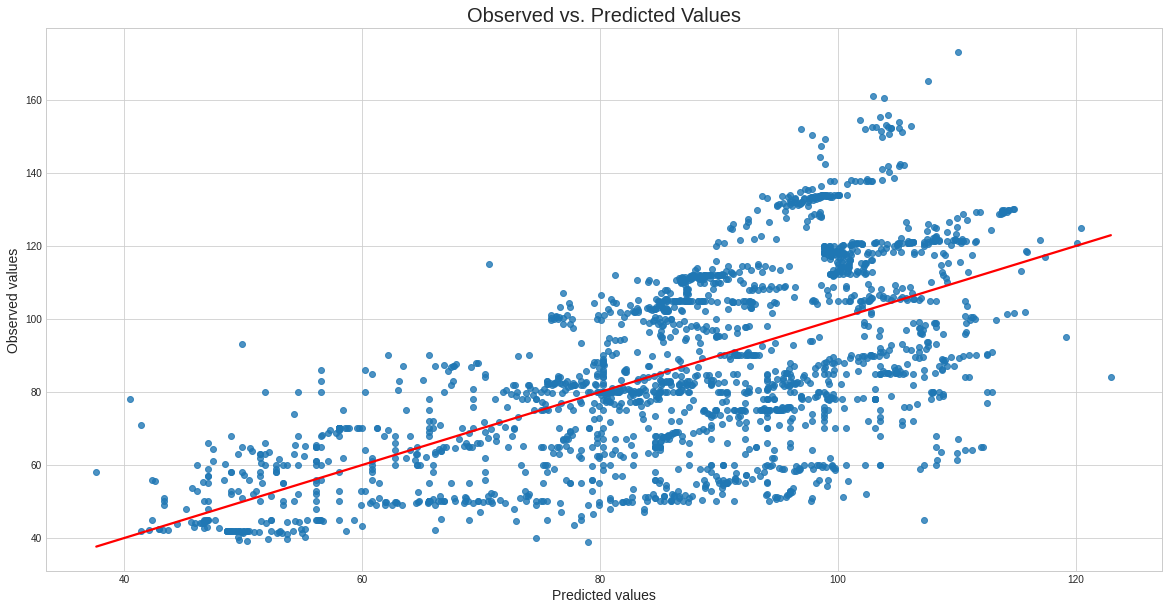

In [ ]:
y_pred = mdl1.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

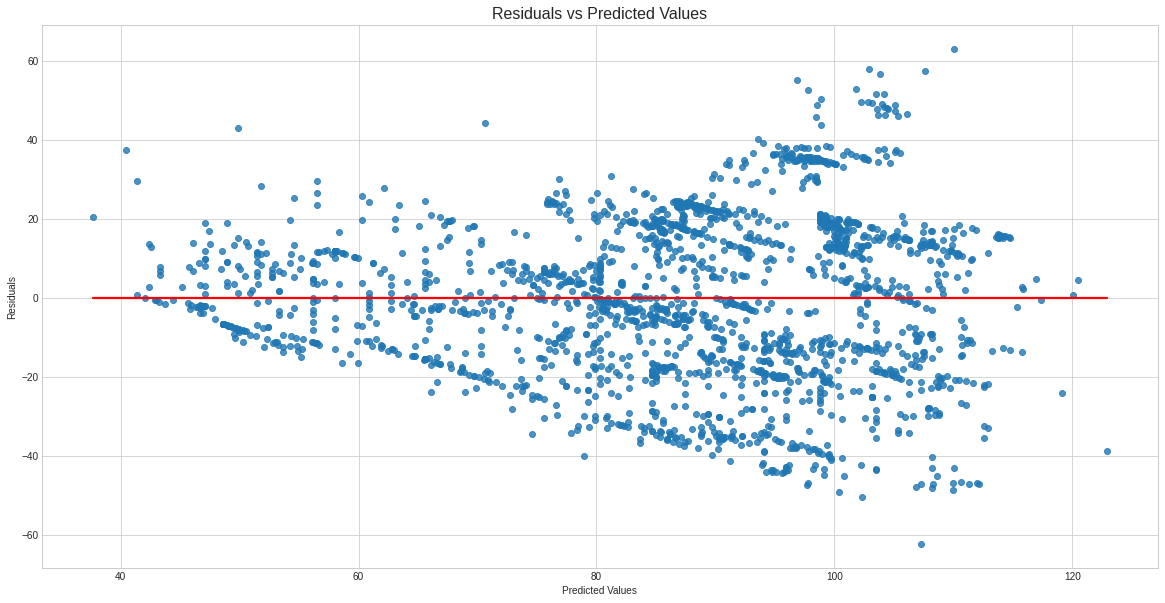

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl1.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = 
{'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

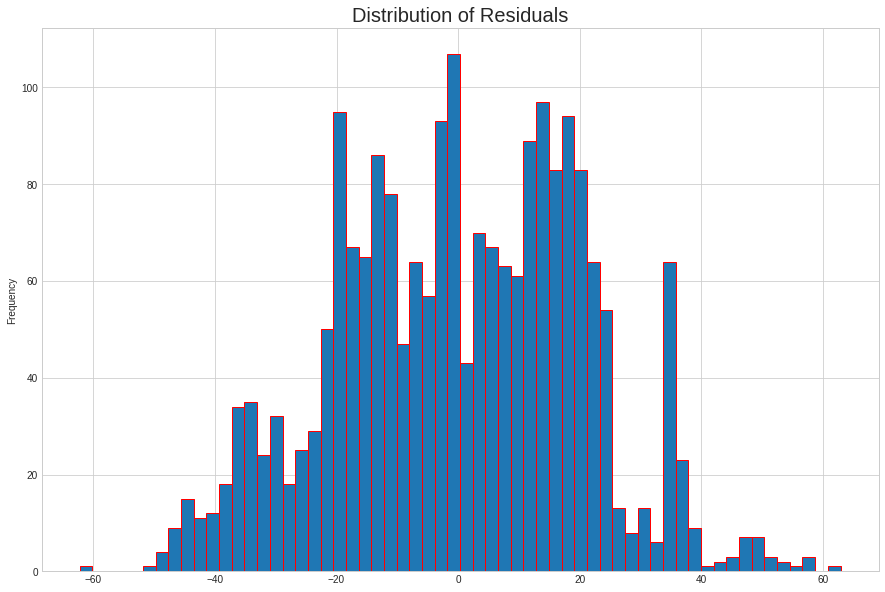

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl1.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 


Shapiro-Wilk Normality Test: w = 0.993 p-value = 0.0


##Model 2

In [ ]:
# Model 2 – ‘Weight’ as the DV
 
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight", "Height", "CAEC"]] #  IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl2 = sm.OLS(y, x).fit() 
print(mdl2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     491.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.09e-242
Time:                        11:50:09   Log-Likelihood:                -9328.5
No. Observations:                2111   AIC:                         1.867e+04
Df Residuals:                    2107   BIC:                         1.869e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Text(0.5, 1.0, 'Observed vs. Predicted Values')

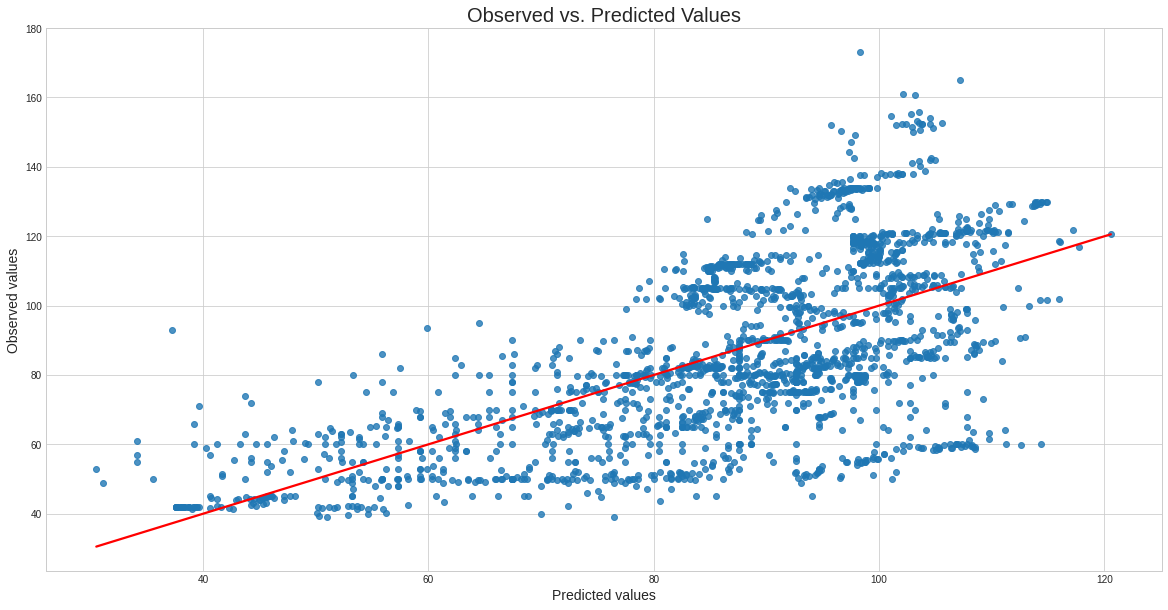

In [ ]:
y_pred = mdl2.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

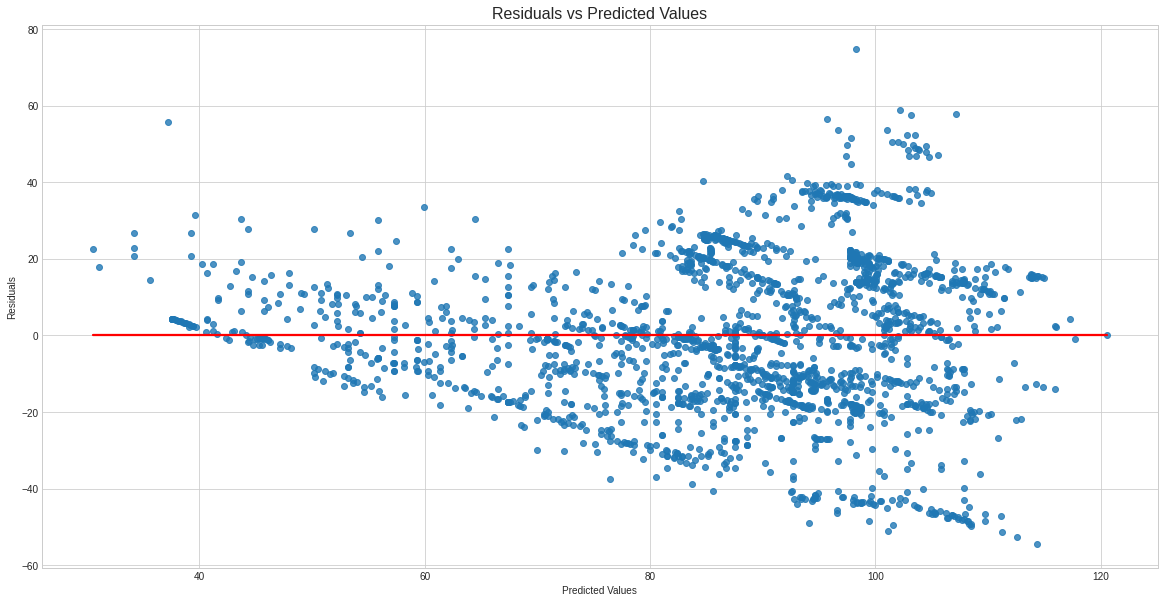

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl2.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = 
{'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

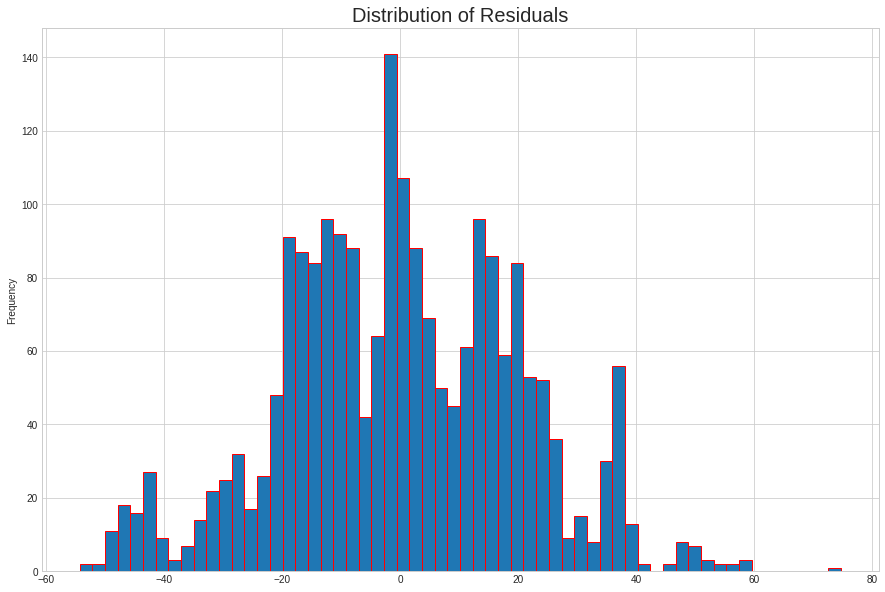

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl2.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 

Shapiro-Wilk Normality Test: w = 0.994 p-value = 0.0


##Model 3

In [ ]:
# Model 3 – ‘Weight’ as the DV
 
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight", "Height", "FCVC"]] #  IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl3 = sm.OLS(y, x).fit() 
print(mdl3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     481.7
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          2.56e-238
Time:                        11:50:10   Log-Likelihood:                -9336.9
No. Observations:                2111   AIC:                         1.868e+04
Df Residuals:                    2107   BIC:                         1.870e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Text(0.5, 1.0, 'Observed vs. Predicted Values')

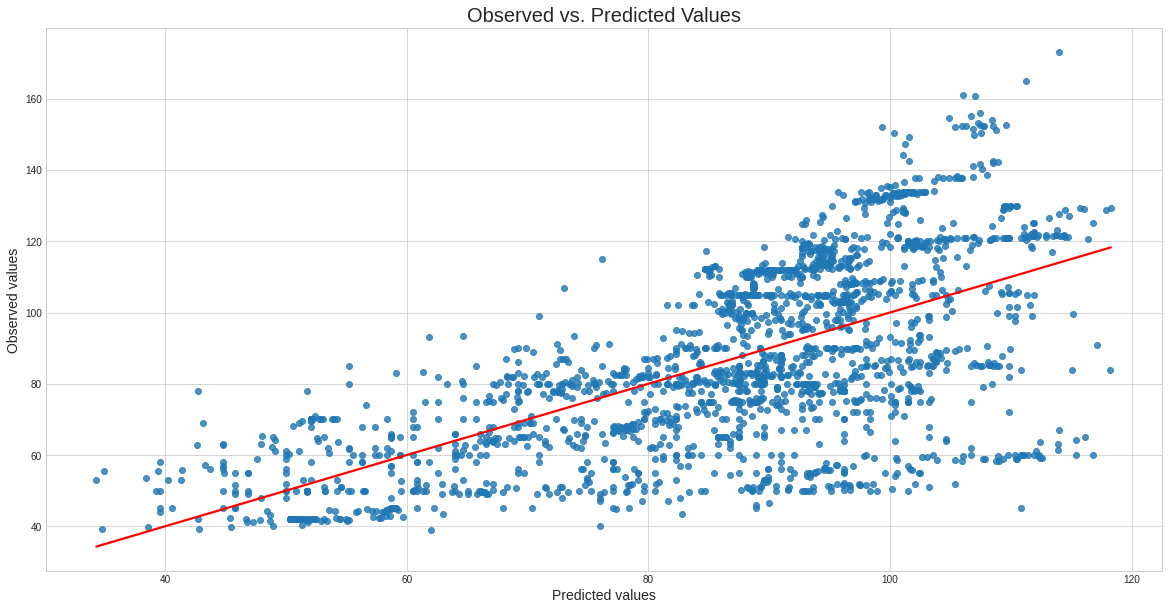

In [ ]:
y_pred = mdl3.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

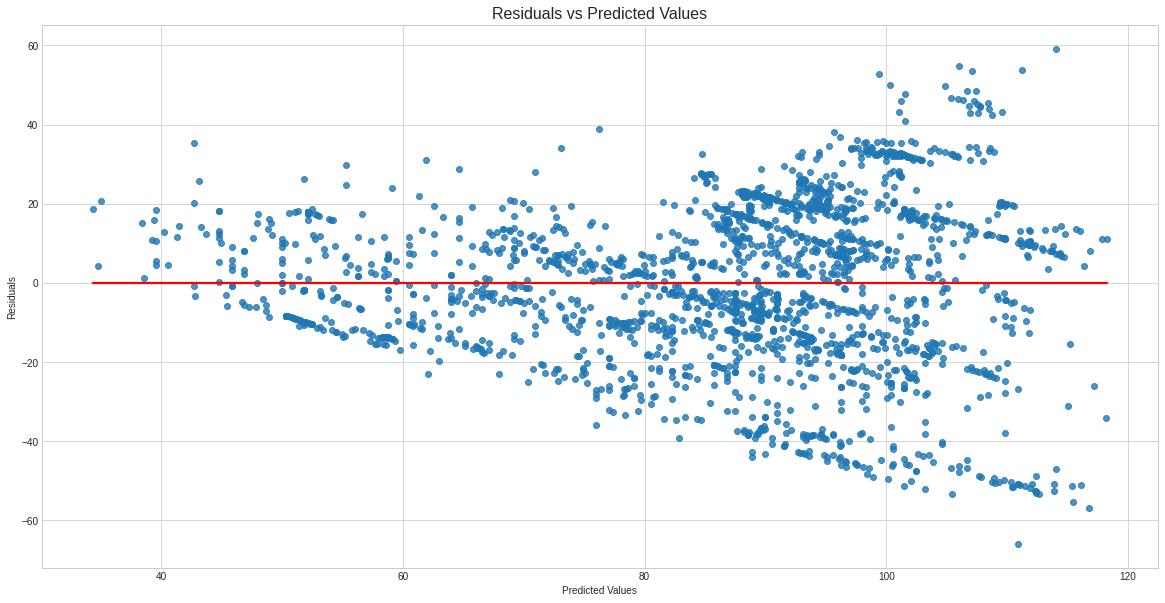

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl3.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = 
{'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

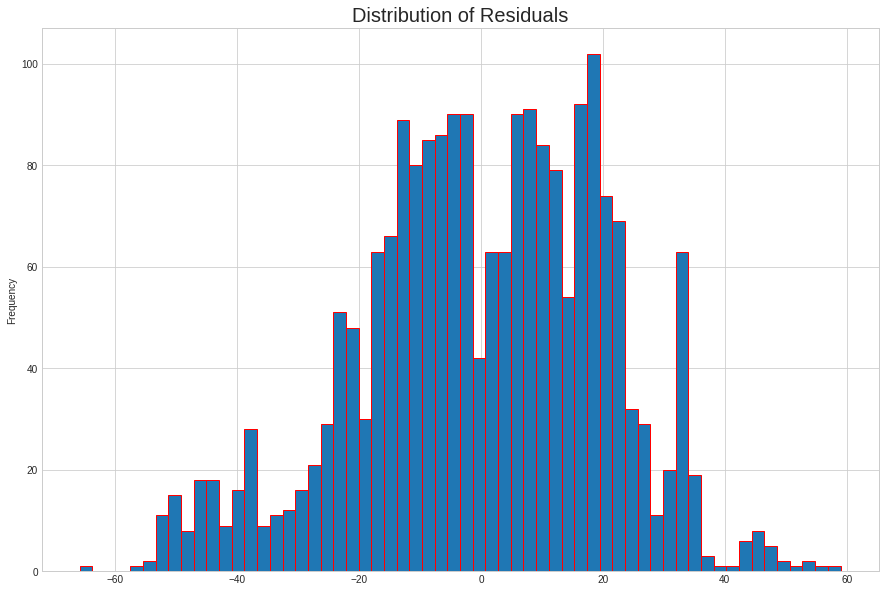

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl3.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 

Shapiro-Wilk Normality Test: w = 0.989 p-value = 0.0


##Model 4

In [ ]:
# Model 4 – ‘Weight’ as the DV
 
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight", "Height", "FAVC"]] #  IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl4 = sm.OLS(y, x).fit() 
print(mdl4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     441.8
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.22e-222
Time:                        11:50:11   Log-Likelihood:                -9373.1
No. Observations:                2111   AIC:                         1.875e+04
Df Residuals:                    2107   BIC:                         1.878e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Text(0.5, 1.0, 'Observed vs. Predicted Values')

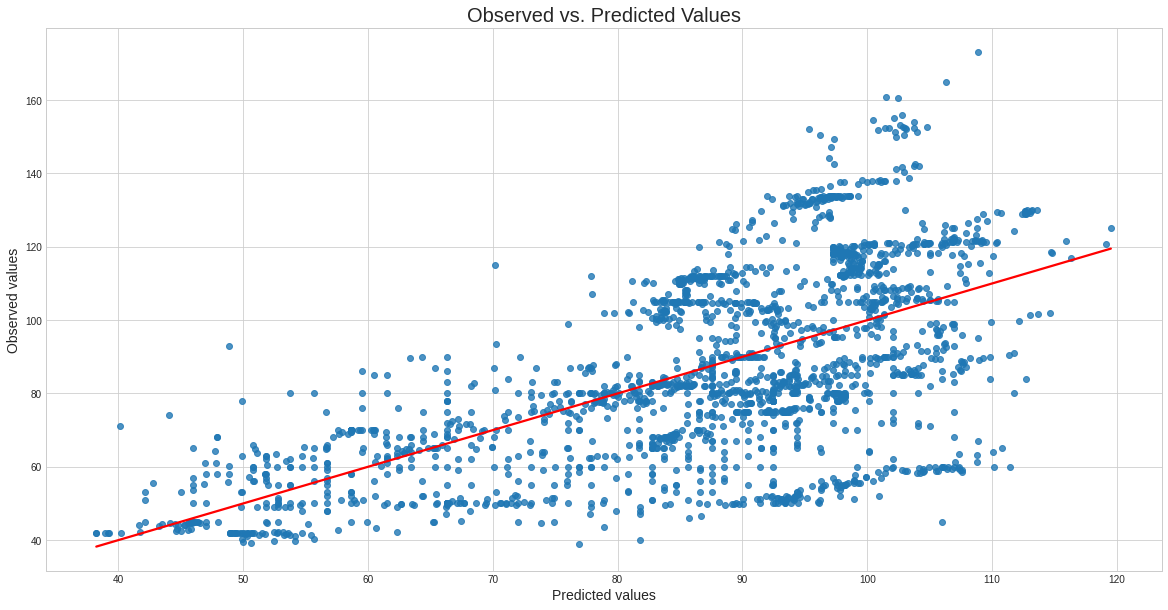

In [ ]:
y_pred = mdl4.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

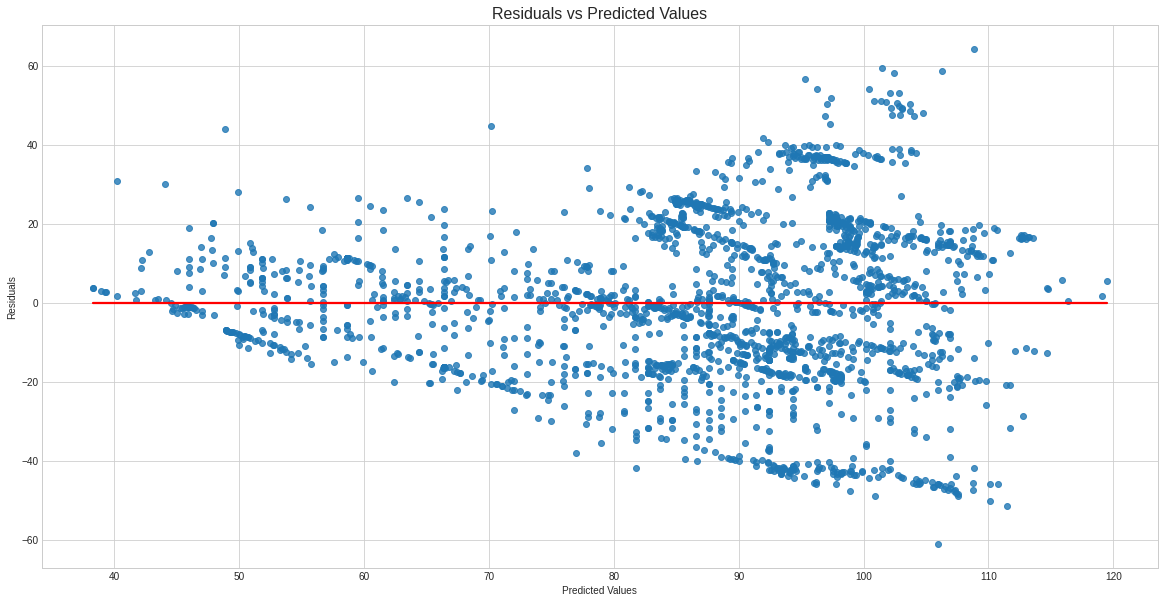

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl4.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = 
{'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

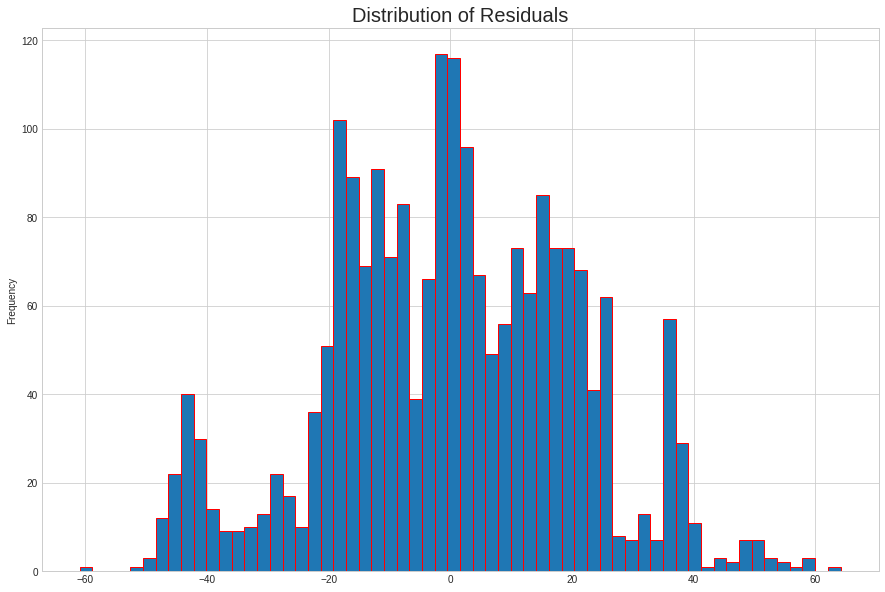

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl3.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 

Shapiro-Wilk Normality Test: w = 0.992 p-value = 0.0


#Machine Learning Model for the alcohol variable(CALC)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Weight'] # Labels
x = df[["family_history_with_overweight", "Height", "CALC"]] # Features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 8)

In [ ]:
# Add a constant to features
x_train = sm.add_constant(x_train)
# Fit a model based on the train data
train_mdl5 = sm.OLS(y_train, x_train).fit()
# Present the model summary
print(train_mdl5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     322.2
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          7.86e-161
Time:                        11:55:00   Log-Likelihood:                -6537.9
No. Observations:                1477   AIC:                         1.308e+04
Df Residuals:                    1473   BIC:                         1.311e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# Create a simple OLS model (the final model in this guide)
y = df['Weight']
x = df[["family_history_with_overweight", "Height", "CALC"]] # IVs include RS, RA
# add a constant to an IV
x = sm.add_constant(x)
mdl5 = sm.OLS(y, x).fit()
# Obtaining predicted y-values ('y_pred4')
y_pred = mdl5.predict()
# Create a data object, df4 that is basically a copy of x4 including thetwo IVs (RS and RA)
df5 = x
# Create two variables that includes 'Actual wins' & 'Predicted wins'from y and y_pred5, respectively
df5['Actual Weight'] = y
df5['Predicted Weight'] = y_pred
df5
# Calculate MSE (Mean Squared Error) (import sklearn & numpy)
from sklearn import metrics
import numpy as np
mse = metrics.mean_squared_error(df5['Actual Weight'], df5['Predicted Weight'])
# Calculate RMSE (Root Mean Squared Error)
np.sqrt(mse)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



20.26227178410475

In [ ]:
# Add a constant to features
x_test = sm.add_constant(x_test)
# Fit a model based on the test data
test_mdl5 = sm.OLS(y_test, x_test).fit()
# Present the model summary
print(test_mdl5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           8.07e-73
Time:                        11:55:00   Log-Likelihood:                -2807.7
No. Observations:                 634   AIC:                             5623.
Df Residuals:                     630   BIC:                             5641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



#Using supervised machine Learning for the BMI model with family history and alcohol 

In [ ]:
y = df['BMI'] # Labels
x = df[["family_history_with_overweight", "CALC"]] # Features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 8)

In [ ]:
# Add a constant to features
x_train = sm.add_constant(x_train)
# Fit a model based on the train data
train_mdl6 = sm.OLS(y_train, x_train).fit()
# Present the model summary
print(train_mdl6.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           7.90e-98
Time:                        11:56:49   Log-Likelihood:                -4934.0
No. Observations:                1477   AIC:                             9874.
Df Residuals:                    1474   BIC:                             9890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# Create a simple OLS model (the final model in this guide)
y = df['BMI']
x = df[["family_history_with_overweight","CALC"]] # IVs include RS, RA
# add a constant to an IV
x = sm.add_constant(x)
mdl6 = sm.OLS(y, x).fit()
# Obtaining predicted y-values ('y_pred4')
y_pred = mdl6.predict()
# Create a data object, df4 that is basically a copy of x4 including thetwo IVs (RS and RA)
df6 = x
# Create two variables that includes 'Actual wins' & 'Predicted wins'from y and y_pred5, respectively
df6['Actual Weight'] = y
df6['Predicted Weight'] = y_pred
df6
# Calculate MSE (Mean Squared Error) (import sklearn & numpy)
from sklearn import metrics
import numpy as np
mse = metrics.mean_squared_error(df6['Actual Weight'], df6['Predicted Weight'])
# Calculate RMSE (Root Mean Squared Error)
np.sqrt(mse)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



6.847961204841492

In [ ]:
# Add a constant to features
x_test = sm.add_constant(x_test)
# Fit a model based on the test data
test_mdl6 = sm.OLS(y_test, x_test).fit()
# Present the model summary
print(test_mdl6.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     127.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           4.06e-47
Time:                        12:01:01   Log-Likelihood:                -2121.5
No. Observations:                 634   AIC:                             4249.
Df Residuals:                     631   BIC:                             4262.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

